# Clustering y Clasificación. Propagación de la afinidad

La técnica de Propagación de la Afinidad es un algoritmo de clustering que intenta encontrar de forma automática el nº de clusters a partir de los puntos del dataset.

## Propagación de la afinidad

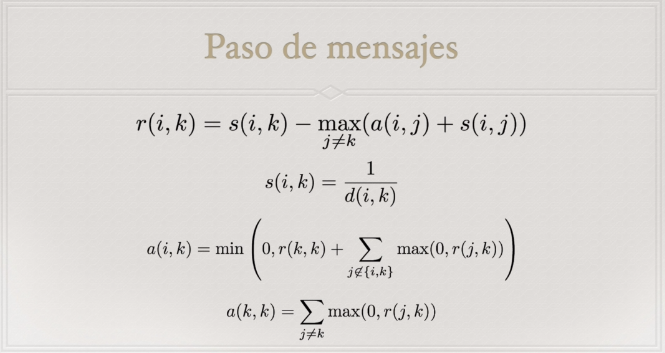

In [2]:
from IPython.display import Image
Image(filename="./images/afinidad_01.png")

In [5]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt
from itertools import cycle

%matplotlib inline

In [6]:
# Creamos un dataset aleatorio
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

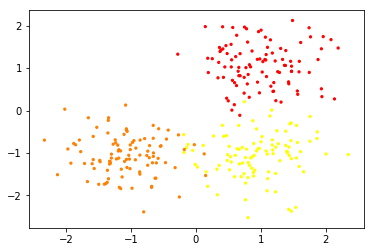

In [7]:
plt.scatter(X[:,0], X[:,1], c=labels, s = 5, cmap = "autumn")

In [8]:
# Calculamos la propagación de la afinidad
af = AffinityPropagation(preference=-50).fit(X)

In [14]:
cluster_center_ids = af.cluster_centers_indices_
cluster_center_ids

array([160, 250, 272], dtype=int64)

In [15]:
labels = af.labels_
labels

array([0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1], d

In [17]:
# ¿Cuantos clusters ha calculado?
n_clust = len(cluster_center_ids)
n_clust

3

In [18]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mútua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members, 1], col +'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1], x[1]], col)
            
    plt.title("Número estimado de clusters %d"%n_clust)
    plt.show()

Número estimado de clusters: 3
Homogeneidad: 1.000
Completitud: 1.000
V-measure: 1.000
R2 ajustado: 1.000
Información mútua ajustada: 1.000
Coeficiente de la silueta: 0.753


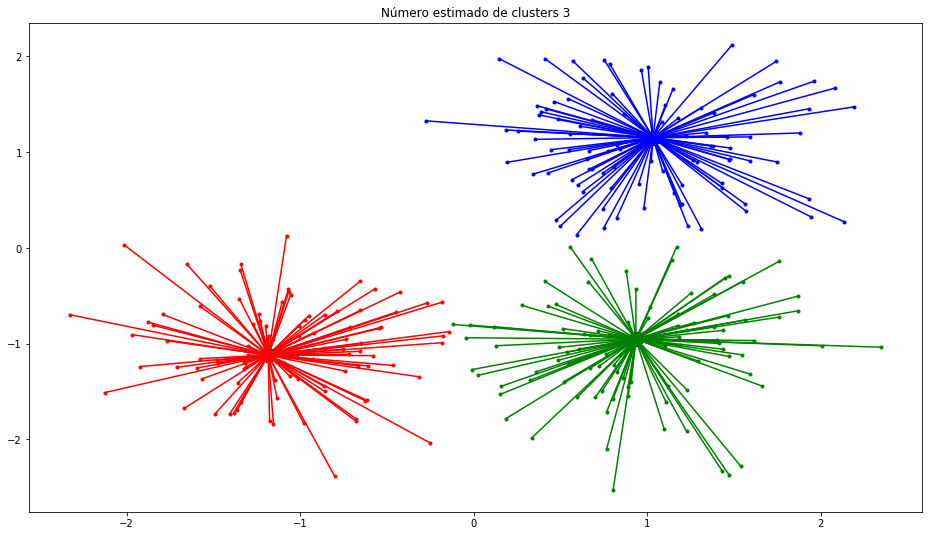

In [21]:
report_affinity_propagation(X)

(array([ 99.,   0.,   0.,   0.,   0., 101.,   0.,   0.,   0., 100.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

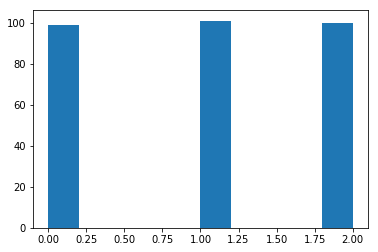

In [20]:
plt.hist(af.labels_)